# Objective:Create a ML model which can predict the selling price of the used cars

In [620]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
%matplotlib inline
import seaborn as sns

In [621]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Checking for Null or missing data

In [622]:
#check for null or missing data
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

cehcking the disctribution of Numeric data

In [623]:
df.describe() #gives details of numerical data with standard stats

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


###Box plot to visulise the outliers observed above from describe.

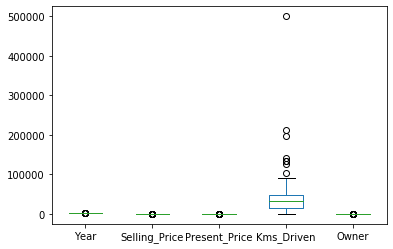

In [624]:
df.plot(kind="box")

###check for numerical and categorical data

In [625]:

df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [626]:
df1=df.copy()

##### Univariate analysis

Categorical data anaysis -Car_Name,Fuel_Type,Seller_Type,Transmission

Car_Name

Various cars and their counts 
 city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Hero Passion X pro     1
TVS Wego               1
Yamaha FZ S            1
TVS Sport              1
camry                  1
Name: Car_Name, Length: 98, dtype: int64


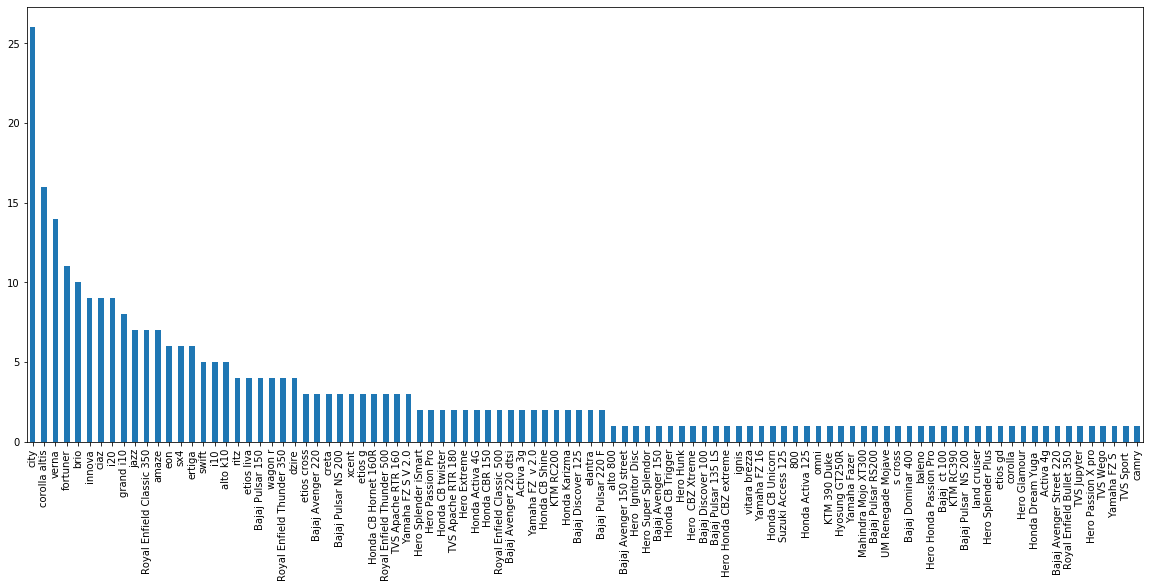

In [627]:
#Lets see what are various brand of cars are available
print("Various cars and their counts","\n",df1["Car_Name"].value_counts())

plt.figure(figsize=(20,8))
df1["Car_Name"].value_counts().plot(kind="bar")
plt.xticks()
plt.show()

Observation:
The most number of cars in the data set are city, corolla altis,verna,fortuner and Brio

Fuel_Type

Various cars with Fuel type 
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


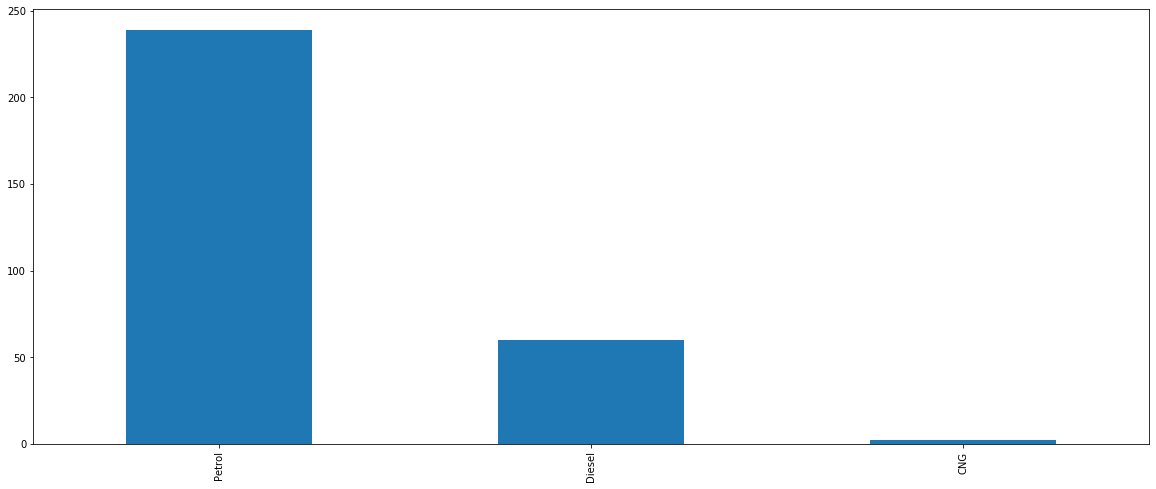

In [628]:
print("Various cars with Fuel type","\n",df1["Fuel_Type"].value_counts())

plt.figure(figsize=(20,8))
df1["Fuel_Type"].value_counts().plot(kind="bar")
plt.xticks()
plt.show()

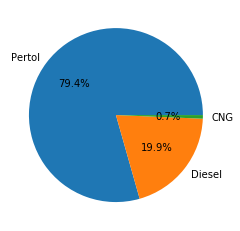

In [629]:
plt.pie(df1["Fuel_Type"].value_counts(),labels=["Pertol","Diesel","CNG"],autopct="%.1f%%")
plt.show()

Observation: Almost 80% of the cars in the data are Petrol cars

Seller_Type

In [630]:
df1["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Various sellers  
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


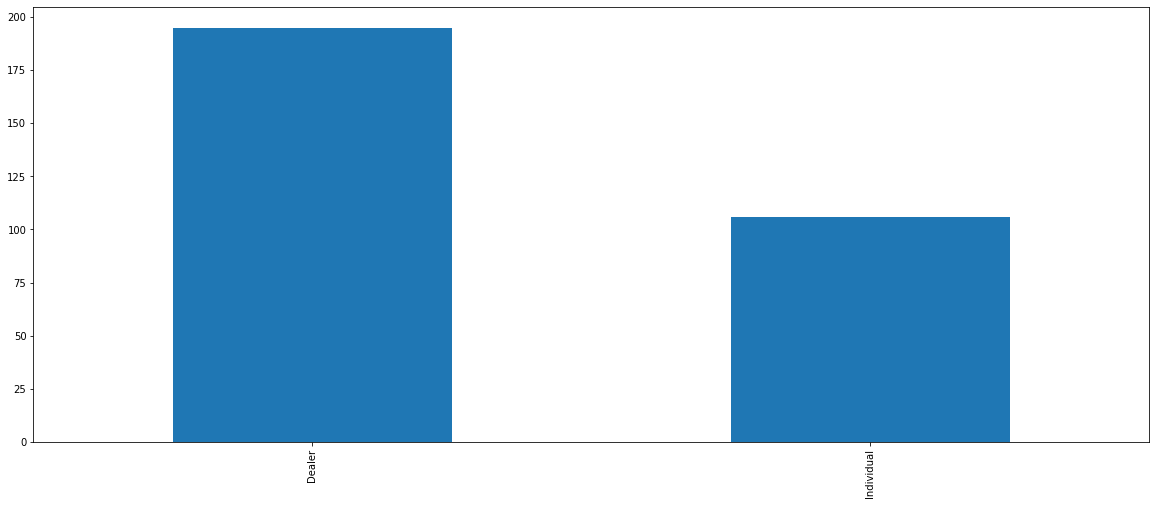

In [631]:
print("Various sellers ","\n",df1["Seller_Type"].value_counts())

plt.figure(figsize=(20,8))
df1["Seller_Type"].value_counts().plot(kind="bar")
plt.xticks()
plt.show()

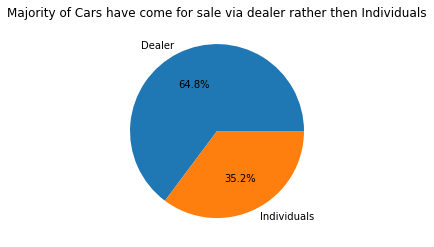

In [632]:
plt.pie(df1["Seller_Type"].value_counts(),labels=["Dealer","Individuals"],autopct="%.1f%%")
plt.title("Majority of Cars have come for sale via dealer rather then Individuals")
plt.show()

Transmission

Various cars and their Transmission  
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


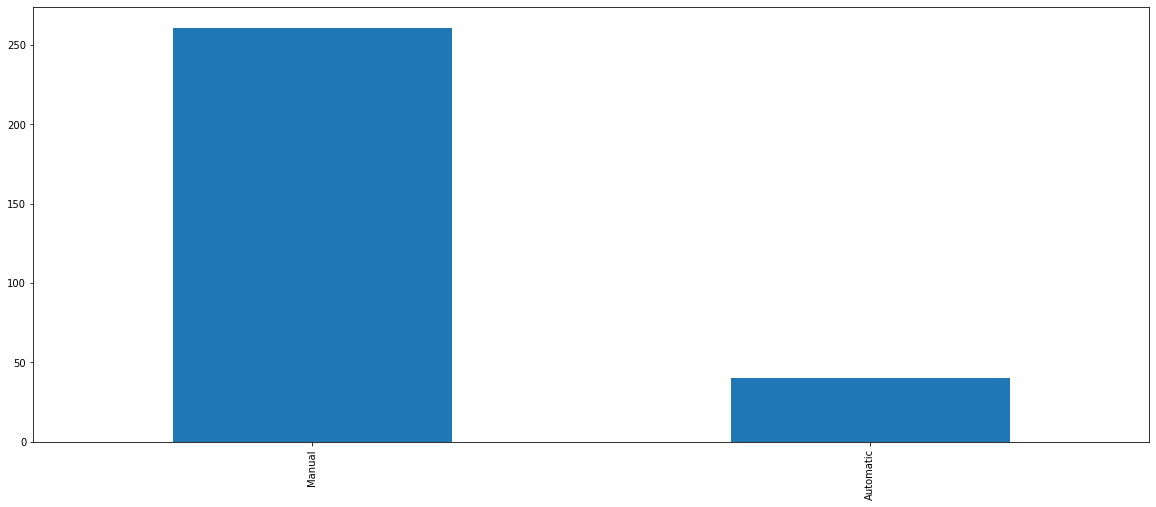

In [633]:
print("Various cars and their Transmission ","\n",df1["Transmission"].value_counts())

plt.figure(figsize=(20,8))
df1["Transmission"].value_counts().plot(kind="bar")
plt.xticks()
plt.show()

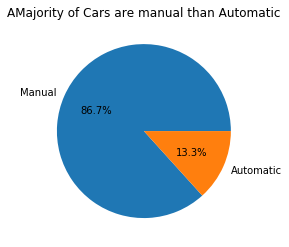

In [634]:
plt.pie(df1["Transmission"].value_counts(),labels=["Manual","Automatic"],autopct="%.1f%%")
plt.title("AMajority of Cars are manual than Automatic")
plt.show()

Analysis of Numeric data

In [635]:
len(df1.describe().columns.values)

5

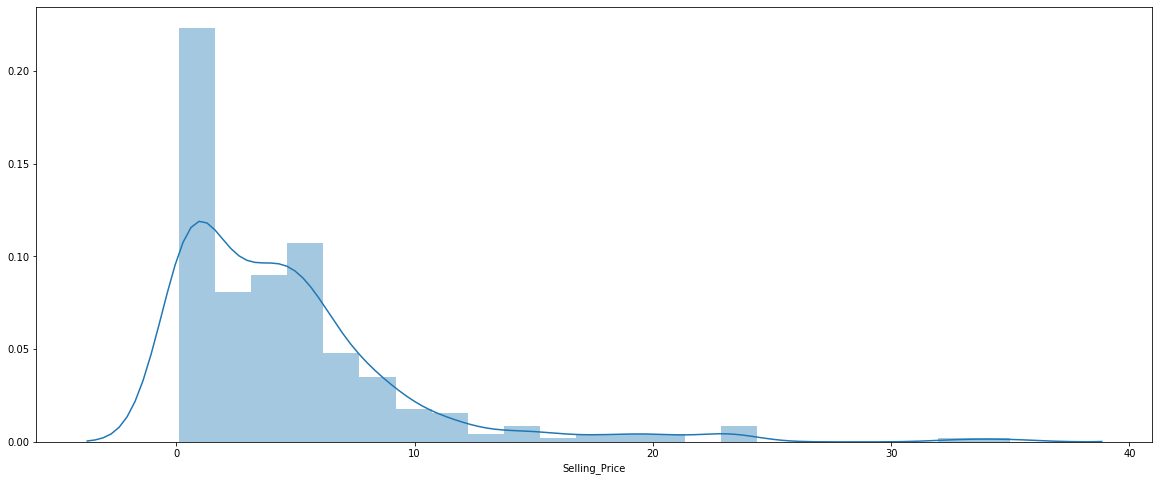

In [636]:
#Distribution of sales price 
plt.figure(figsize=(20,8))
sns.distplot(df1["Selling_Price"])
plt.show()


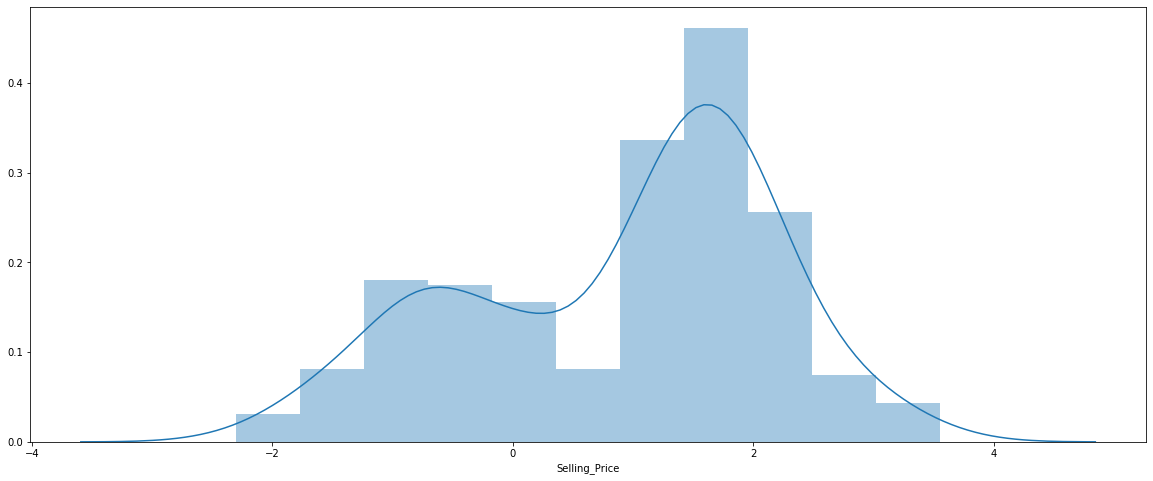

In [637]:
df1["Selling_Price"]=np.log(df1["Selling_Price"])
plt.figure(figsize=(20,8))
sns.distplot(df1["Selling_Price"])
plt.show()

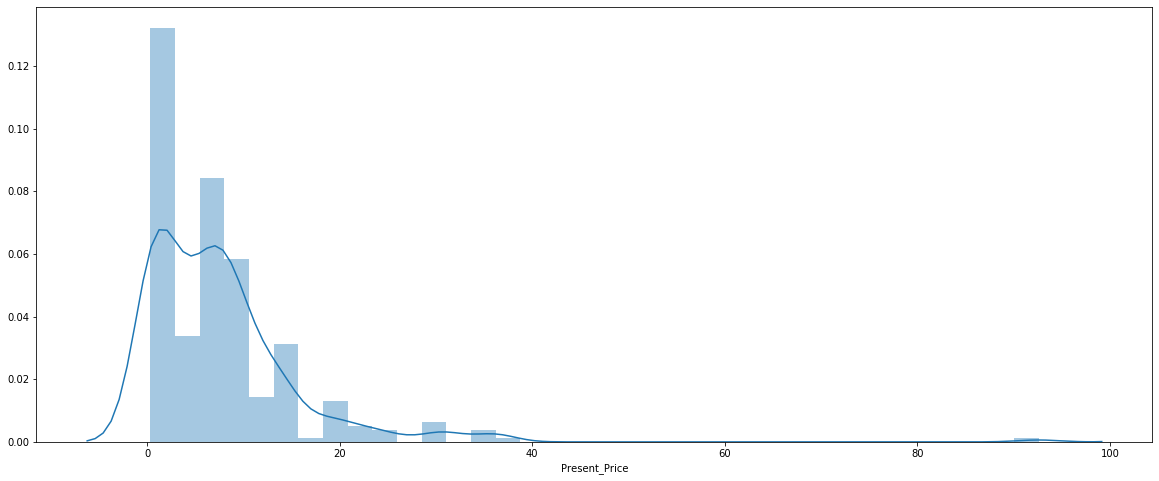

In [638]:
#Distribution of Present_Price
plt.figure(figsize=(20,8))
sns.distplot(df1["Present_Price"])
plt.show()

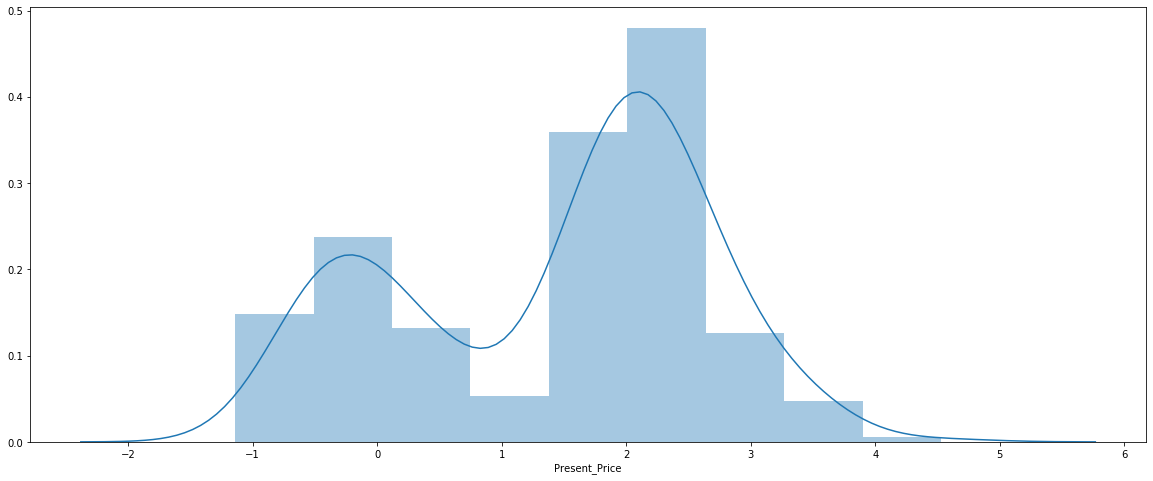

In [639]:
df1["Present_Price"]=np.log(df1["Present_Price"])
plt.figure(figsize=(20,8))
sns.distplot(df1["Present_Price"])
plt.show()

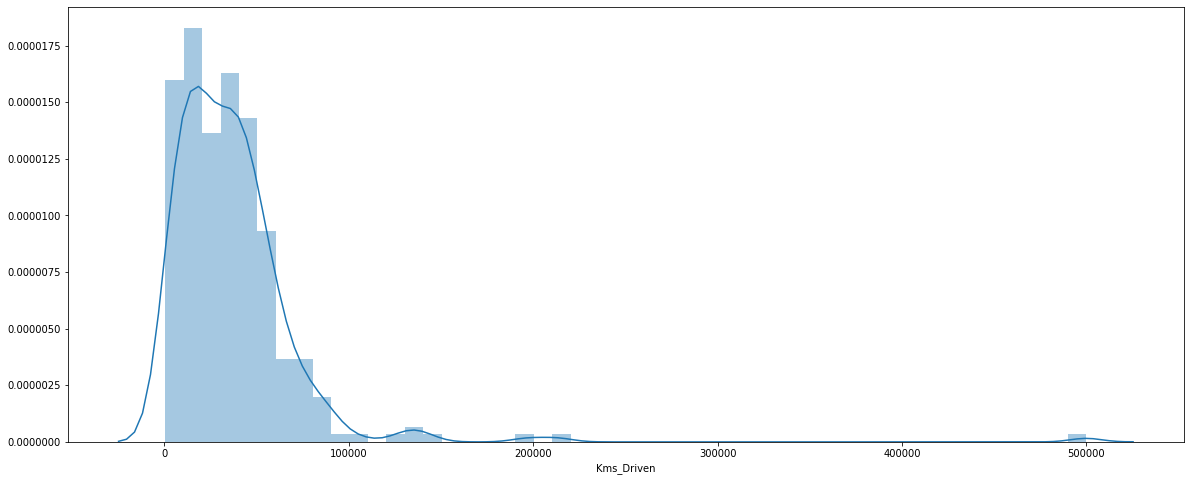

In [640]:
#Distribution of Kms_Driven
plt.figure(figsize=(20,8))
sns.distplot(df1["Kms_Driven"])
plt.show()

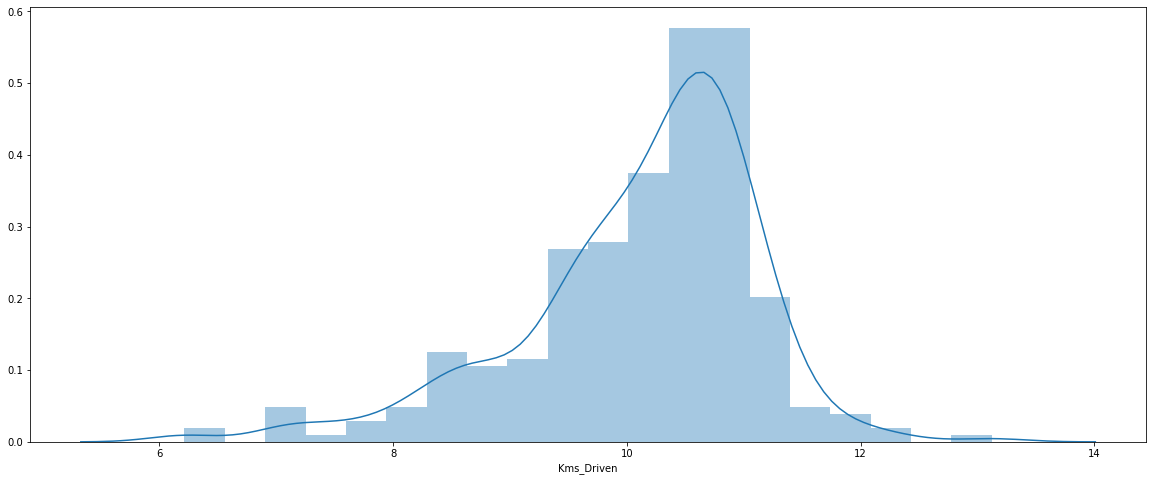

In [641]:
df1["Kms_Driven"]=np.log(df1["Kms_Driven"])
plt.figure(figsize=(20,8))
sns.distplot(df1["Kms_Driven"])
plt.show()

In [642]:
df1["Owner"].value_counts().sort_values()

3      1
1     10
0    290
Name: Owner, dtype: int64

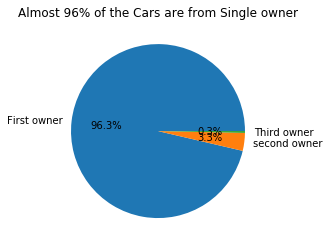

In [643]:

plt.pie(df1["Owner"].value_counts(),labels=["First owner","second owner","Third owner"],autopct="%.1f%%")
plt.title("Almost 96% of the Cars are from Single owner")
plt.show()

In [644]:
data=df1["Year"].unique()
data

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

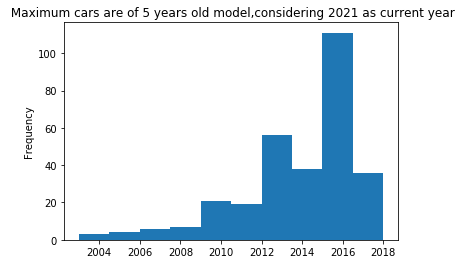

In [645]:
df1["Year"].plot(kind="hist")
plt.title(" Maximum cars are of 5 years old model,considering 2021 as current year")
plt.show()

Bivariate Analysis to find relationship

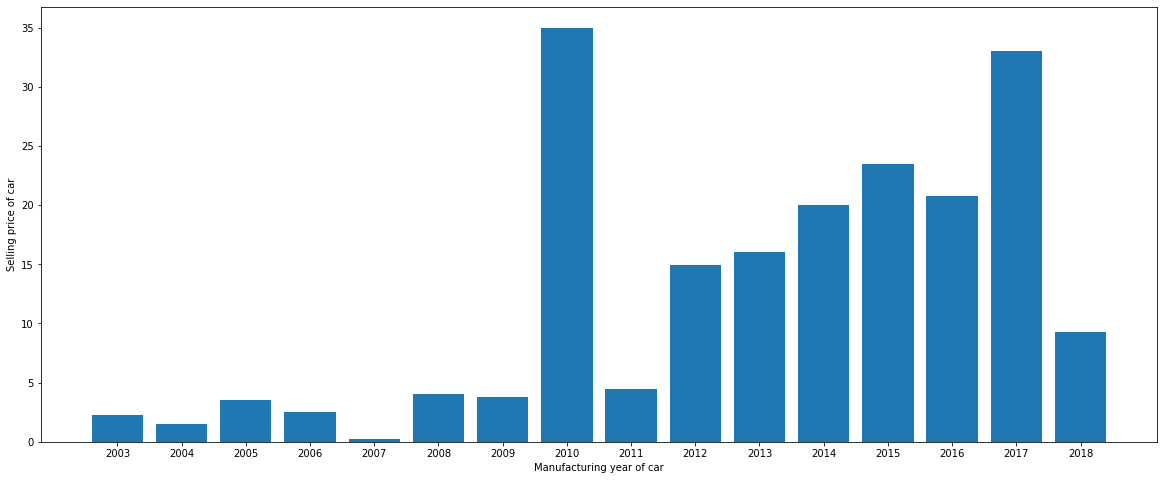

In [646]:
#relationship between year of car and Selling price
plt.figure(figsize=(20,8))
plt.bar(df["Year"],df["Selling_Price"])
plt.xlabel("Manufacturing year of car")
plt.ylabel("Selling price of car")
plt.xticks(df["Year"].unique())
plt.show()

In [647]:
data=df1[["Car_Name","Selling_Price"]][(df1["Year"]==2010)].sort_values("Selling_Price",ascending=False)
print(" Car with Manufacturing year 2010 has Highest selling price of $${} thousand dollars is {}".format(data["Selling_Price"].values[0],data["Car_Name"].values[0]))
data=df1[["Car_Name","Selling_Price"]][(df1["Year"]==2017)].sort_values("Selling_Price",ascending=False)
print("Car with Manufacturing year 2017 has Highest selling price of $${} thousand dollars is {}".format(data["Selling_Price"].values[0],data["Car_Name"].values[0]))

 Car with Manufacturing year 2010 has Highest selling price of $$3.5553480614894135 thousand dollars is land cruiser
Car with Manufacturing year 2017 has Highest selling price of $$3.4965075614664802 thousand dollars is fortuner


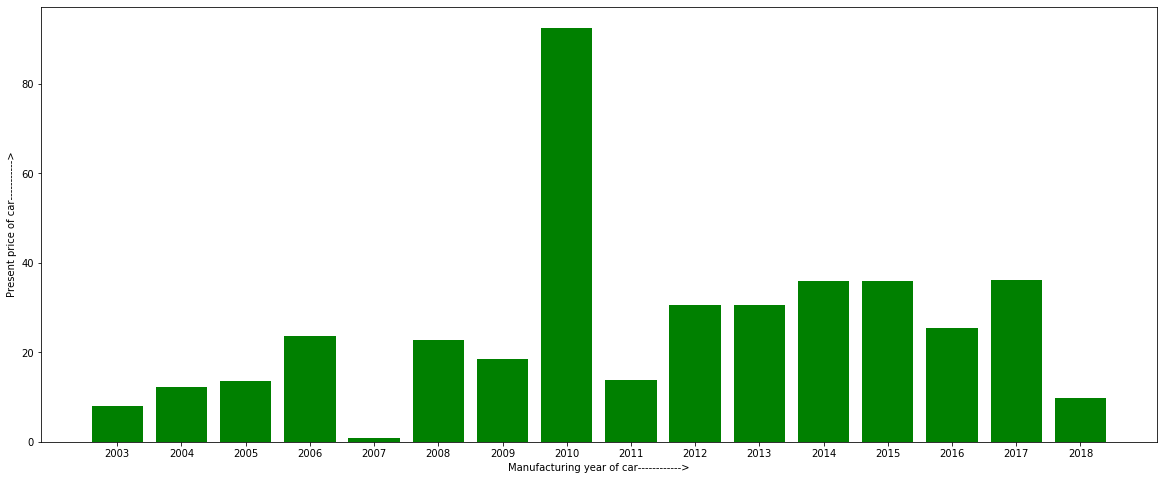

In [648]:
#relationship between year of car and Selling price
plt.figure(figsize=(20,8))
plt.bar(df["Year"],df["Present_Price"],color="green")
plt.xlabel("Manufacturing year of car------------>")
plt.ylabel("Present price of car----------->")
plt.xticks(df["Year"].unique())
plt.show()

In [649]:
data=df1[["Car_Name","Present_Price"]][(df1["Year"]==2010)].sort_values("Present_Price",ascending=False)
print("Car {} with Manufacturing year of 2010 has Highest present price of $${} thousand dollars ".format(data["Car_Name"].values[0],data["Present_Price"].values[0]))


Car land cruiser with Manufacturing year of 2010 has Highest present price of $$4.528289141652134 thousand dollars 


### analysis started

In [650]:
df1=df.copy()

In [651]:
df1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [652]:
df1["Car_Name"].dtype

dtype('O')

In [653]:
cat_col=[]
num_col=[]

for col in df1.columns:
    #print(col)
    if df1[col].dtype=="O":
        cat_col.append(col)
    else:
        num_col.append(col)
        
print("numerical columns are",num_col)
print("ctegorical columns are",cat_col)
#print(cat_col)

numerical columns are ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']
ctegorical columns are ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


New Feature creation- vehicle_age

In [654]:

df1["Year"].dtypes
current_year=2021
df1["vehicle_age"]=df1["Year"].apply(lambda x:current_year-x)
df1["vehicle_age"].head()

0     7
1     8
2     4
3    10
4     7
Name: vehicle_age, dtype: int64

In [655]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


Finding relationshipof Selling price with Fuel type

In [656]:

df1.groupby("Fuel_Type").Selling_Price.agg(["min","max","mean","count"])

,min,max,mean,count
Fuel_Type,,,,
CNG,2.95,3.25,3.100000,2
Diesel,3.10,35.00,10.278500,60
Petrol,0.10,19.75,3.264184,239


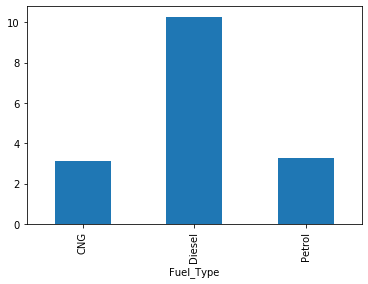

In [657]:
df1.groupby("Fuel_Type").Selling_Price.mean().plot(kind="bar")

Observation- Diesel cars on an average has highest Selling price 

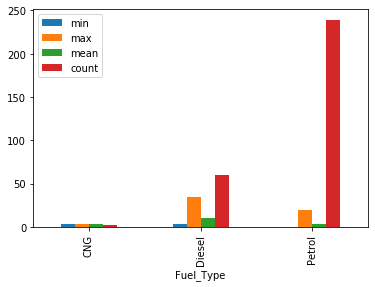

In [658]:
df1.groupby("Fuel_Type").Selling_Price.agg(["min","max","mean","count"]).plot(kind="bar")

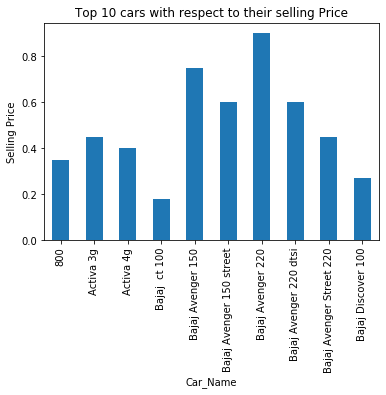

In [659]:
df1.groupby("Car_Name").Selling_Price.max().head(10).plot(kind="bar")
plt.ylabel("Selling Price")
plt.title("Top 10 cars with respect to their selling Price")
plt.show()

In [660]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [661]:
df1[cat_col]

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [662]:
len(df1["Car_Name"].unique())

98

There are 98 cars which means the variable car_Name has 98 unique categories and uon encoding it will drastically increase the dimensions leading to Curse of dimesionality. we are planning to encode them based on top 10 cars tp reduce the dimensions.

In [663]:

top_10_cars=df1["Car_Name"].value_counts().head(10).to_dict()
top_10_cars

{'city': 26,
 'corolla altis': 16,
 'verna': 14,
 'fortuner': 11,
 'brio': 10,
 'innova': 9,
 'ciaz': 9,
 'i20': 9,
 'grand i10': 8,
 'jazz': 7}

In [664]:
# we will encode thedata for top 10 features as 1 and make others as 0
top_10=[x for x in df1["Car_Name"].value_counts().head(10).index]

In [665]:
top_10

['city',
 'corolla altis',
 'verna',
 'fortuner',
 'brio',
 'innova',
 'ciaz',
 'i20',
 'grand i10',
 'jazz']

In [666]:
#encoding the car_name variable
for col in top_10:
    df1["Car_Name_"+col]=np.where(df1["Car_Name"]==col,1,0)

In [667]:
df1.head(40)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age,Car_Name_city,Car_Name_corolla altis,Car_Name_verna,Car_Name_fortuner,Car_Name_brio,Car_Name_innova,Car_Name_ciaz,Car_Name_i20,Car_Name_grand i10,Car_Name_jazz
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,0,0,0,0,0,0,0,0,0,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,0,0,0,0,0,0,0,0,0,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,0,0,0,0,0,0,1,0,0,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,0,0,0,0,0,0,0,0,0,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,0,0,0,0,0,0,0,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,3,0,0,0,0,0,0,0,0,0,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,6,0,0,0,0,0,0,1,0,0,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,6,0,0,0,0,0,0,0,0,0,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,5,0,0,0,0,0,0,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,6,0,0,0,0,0,0,1,0,0,0


Encoding of categorical Variables for Modeling

In [668]:
#categorical variables
for col in cat_col:
        top_10=df[col].value_counts().head(10).index
        print(top_10)

Index(['city', 'corolla altis', 'verna', 'fortuner', 'brio', 'innova', 'ciaz',
       'i20', 'grand i10', 'jazz'],
      dtype='object')
Index(['Petrol', 'Diesel', 'CNG'], dtype='object')
Index(['Dealer', 'Individual'], dtype='object')
Index(['Manual', 'Automatic'], dtype='object')


In [669]:
def one_hot_encode(df,cat_col,top_10):
    for col in cat_col:
        print("col",col)
        top_10=df[col].value_counts().head(10).index
        print("top_10",top_10)
        for label in top_10:
            print("label",label)
            df[col+"_"+label]=np.where(df[col]==label,1,0)
        
    

In [670]:
one_hot_encode(df1,cat_col,top_10)

col Car_Name
top_10 Index(['city', 'corolla altis', 'verna', 'fortuner', 'brio', 'innova', 'ciaz',
       'i20', 'grand i10', 'jazz'],
      dtype='object')
label city
label corolla altis
label verna
label fortuner
label brio
label innova
label ciaz
label i20
label grand i10
label jazz
col Fuel_Type
top_10 Index(['Petrol', 'Diesel', 'CNG'], dtype='object')
label Petrol
label Diesel
label CNG
col Seller_Type
top_10 Index(['Dealer', 'Individual'], dtype='object')
label Dealer
label Individual
col Transmission
top_10 Index(['Manual', 'Automatic'], dtype='object')
label Manual
label Automatic


In [671]:
df1.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'vehicle_age',
       'Car_Name_city', 'Car_Name_corolla altis', 'Car_Name_verna',
       'Car_Name_fortuner', 'Car_Name_brio', 'Car_Name_innova',
       'Car_Name_ciaz', 'Car_Name_i20', 'Car_Name_grand i10', 'Car_Name_jazz',
       'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Fuel_Type_CNG',
       'Seller_Type_Dealer', 'Seller_Type_Individual', 'Transmission_Manual',
       'Transmission_Automatic'],
      dtype='object')

In [672]:
#lets encode
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age,...,Car_Name_i20,Car_Name_grand i10,Car_Name_jazz,Fuel_Type_Petrol,Fuel_Type_Diesel,Fuel_Type_CNG,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Manual,Transmission_Automatic
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7,...,0,0,0,1,0,0,1,0,1,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8,...,0,0,0,0,1,0,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4,...,0,0,0,1,0,0,1,0,1,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10,...,0,0,0,1,0,0,1,0,1,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7,...,0,0,0,0,1,0,1,0,1,0


Dropping the variables which are encoded as well as year which is already used to derive vehicle age

In [673]:
df1.drop(columns=cat_col,inplace=True)

In [674]:
df1.drop(columns=["Year"],inplace=True)

In [675]:
df1.drop(columns=["Fuel_Type_Petrol","Seller_Type_Dealer","Transmission_Automatic"],inplace=True)

In [676]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,vehicle_age,Car_Name_city,Car_Name_corolla altis,Car_Name_verna,Car_Name_fortuner,Car_Name_brio,Car_Name_innova,Car_Name_ciaz,Car_Name_i20,Car_Name_grand i10,Car_Name_jazz,Fuel_Type_Diesel,Fuel_Type_CNG,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,4.75,9.54,43000,0,8,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,7.25,9.85,6900,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,2.85,4.15,5200,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4.60,6.87,42450,0,7,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Dividing the data in Features and Targets.

In [677]:
#target is Selling price
X=df1.drop("Selling_Price",axis=1)
y=df1["Selling_Price"]

In [678]:
X.head()

,Present_Price,Kms_Driven,Owner,vehicle_age,Car_Name_city,Car_Name_corolla altis,Car_Name_verna,Car_Name_fortuner,Car_Name_brio,Car_Name_innova,Car_Name_ciaz,Car_Name_i20,Car_Name_grand i10,Car_Name_jazz,Fuel_Type_Diesel,Fuel_Type_CNG,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,9.54,43000,0,8,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,9.85,6900,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,4.15,5200,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,6.87,42450,0,7,0,0,0,0,0,0,0,0,0,0,1,0,0,1


Feature selecton

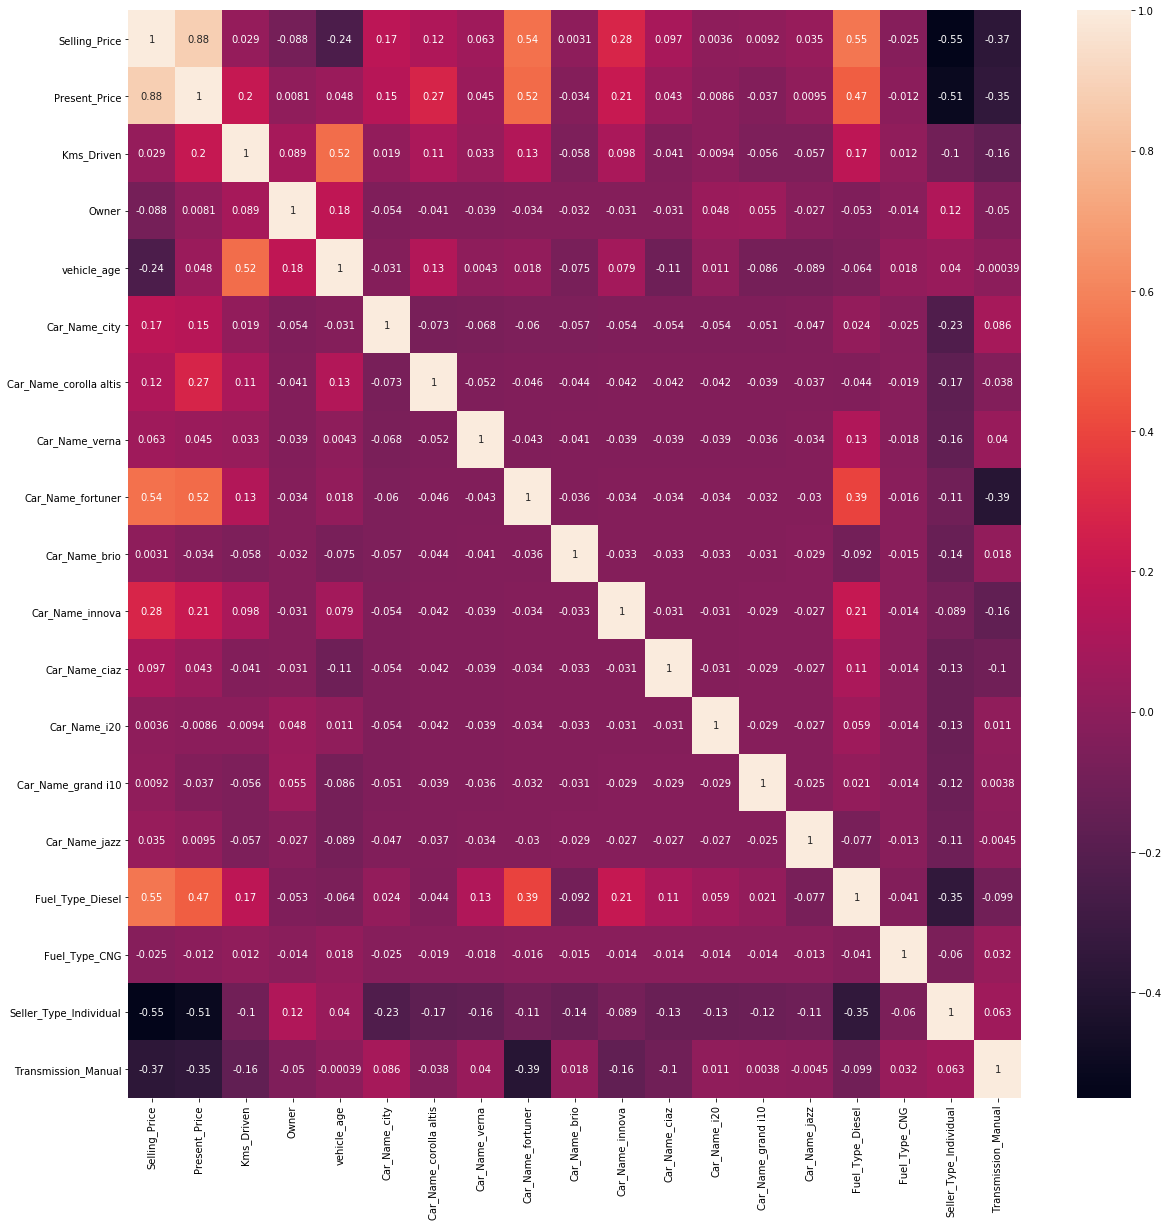

In [679]:
df1_corr=df1.corr()
top_features=df1_corr.index
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(df1[top_features].corr(),annot=True)
plt.show()

In [680]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns corr_matrix = dataset.corr() for i in range(len(corr_matrix.columns)):
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [681]:
threshold=0.60 #industry standard
correlation(X, threshold)

set()

### Information gain

In [682]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X,y)
mutual_info

array([1.30246748, 0.16701346, 0.03737902, 0.27880994, 0.09923839,
       0.        , 0.073633  , 0.06756471, 0.07939736, 0.03363797,
       0.0904499 , 0.00819391, 0.05779238, 0.05127699, 0.16682338,
       0.00596557, 0.54734787, 0.11227512])

In [683]:
#features based on mutual information.it can be >1 its a non negetive value
feature_info=pd.Series(mutual_info,index=X.columns)
feature_info.sort_values(ascending=False)

Present_Price             1.302467
Seller_Type_Individual    0.547348
vehicle_age               0.278810
Kms_Driven                0.167013
Fuel_Type_Diesel          0.166823
Transmission_Manual       0.112275
Car_Name_city             0.099238
Car_Name_ciaz             0.090450
Car_Name_brio             0.079397
Car_Name_verna            0.073633
Car_Name_fortuner         0.067565
Car_Name_grand i10        0.057792
Car_Name_jazz             0.051277
Owner                     0.037379
Car_Name_innova           0.033638
Car_Name_i20              0.008194
Fuel_Type_CNG             0.005966
Car_Name_corolla altis    0.000000
dtype: float64

####selectK first Univariate analysis

In [684]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model=SelectKBest()

In [685]:
feature_kbest=model.fit(X,y)

In [686]:
feature_kbest.scores_

array([16.01628833,  6.06346217,  0.73530975,  1.82019674,  3.56238758,
        1.73131186,  2.53789441,  6.50021434,  1.21420465,  3.51957795,
        2.33156146,  0.53678978,  1.04361375,  2.40161127,  2.84405533,
        0.65754704, 20.12704171,  1.82258269])

In [687]:
kbest_scores=pd.DataFrame(feature_kbest.scores_,columns=["Scores"])
df_scores=pd.DataFrame(X.columns,columns=["features"])

In [688]:
final_df=pd.concat([df_scores,kbest_scores],axis=1)
#top features
final_df[["features","Scores"]].sort_values("Scores",ascending=False,axis=0)

,features,Scores
16,Seller_Type_Individual,20.127042
0,Present_Price,16.016288
7,Car_Name_fortuner,6.500214
1,Kms_Driven,6.063462
4,Car_Name_city,3.562388
9,Car_Name_innova,3.519578
14,Fuel_Type_Diesel,2.844055
6,Car_Name_verna,2.537894
13,Car_Name_jazz,2.401611
10,Car_Name_ciaz,2.331561


In [689]:
#top_features
top_features=final_df[["features","Scores"]].sort_values("Scores",ascending=False,axis=0).head(4)

In [690]:
final_features=top_features.features.tolist()
final_features

['Seller_Type_Individual', 'Present_Price', 'Car_Name_fortuner', 'Kms_Driven']

# since with these 2 approaches of feature selection, we can conclude that we are able to find top 10 features which are consistant with feature selection apporach.

In [691]:
###splitting data to train and test

In [692]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X[final_features],y,random_state=1)

In [693]:
X_train.columns

Index(['Seller_Type_Individual', 'Present_Price', 'Car_Name_fortuner',
       'Kms_Driven'],
      dtype='object')

In [694]:
X_train.head()

,Seller_Type_Individual,Present_Price,Car_Name_fortuner,Kms_Driven
106,1,3.45,0,16500
289,0,13.60,0,10980
5,0,9.83,0,2071
290,0,6.40,0,19000
38,0,3.76,0,10079


In [695]:
y_train.head()

106     1.35
289    10.11
5       9.25
290     4.50
38      3.00
Name: Selling_Price, dtype: float64

ValueError: x and y must be the same size

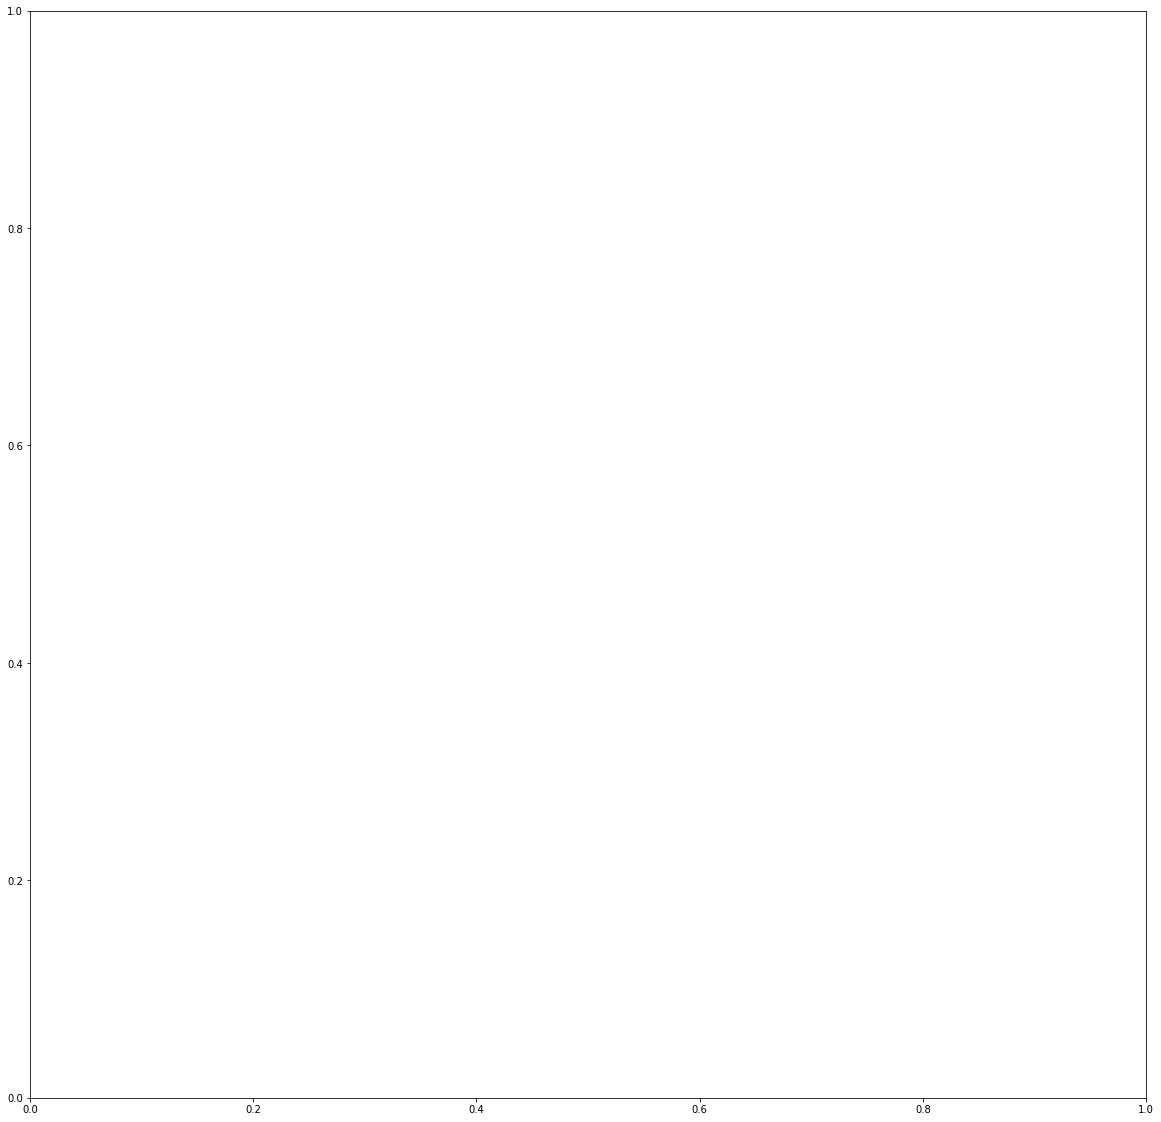

In [696]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,lr.predict(X_train), color = 'blue')
plt.show()

finding relationship betwen Features and target

In [493]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)

array([[ 1.38639025e+00, -4.74073731e-01, -1.92006144e-01,
        -4.90943215e-01],
       [-7.21297629e-01,  6.60101871e-01, -1.92006144e-01,
        -6.19858901e-01],
       [-7.21297629e-01,  2.38836648e-01, -1.92006144e-01,
        -8.27922280e-01],
       [-7.21297629e-01, -1.44436487e-01, -1.92006144e-01,
        -4.32557487e-01],
       [-7.21297629e-01, -4.39433885e-01, -1.92006144e-01,
        -6.40901118e-01],
       [ 1.38639025e+00, -6.60681933e-01, -1.92006144e-01,
        -7.36163271e-01],
       [-7.21297629e-01,  1.42553073e+00,  5.20816666e+00,
         5.01614154e-01],
       [-7.21297629e-01,  7.93074183e-01, -1.92006144e-01,
        -5.75018663e-01],
       [ 1.38639025e+00, -6.91969536e-01, -1.92006144e-01,
        -4.55911778e-01],
       [-7.21297629e-01,  4.10543012e-02, -1.92006144e-01,
         1.74654079e-01],
       [-7.21297629e-01, -3.45571076e-01, -1.92006144e-01,
        -3.50420446e-01],
       [ 1.38639025e+00, -7.62366642e-01, -1.92006144e-01,
      

In [494]:
sc.transform(X_test)

array([[-0.72129763,  0.09022053, -0.19200614, -0.52459675],
       [-0.72129763, -0.34557108, -0.19200614, -0.17566029],
       [ 1.38639025, -0.76728327, -0.19200614, -0.73616327],
       [-0.72129763, -0.36456712, -0.19200614, -0.52597465],
       [ 1.38639025, -0.69196954, -0.19200614, -0.52597465],
       [-0.72129763, -0.06286524, -0.19200614, -0.58485082],
       [ 1.38639025, -0.75342733, -0.19200614, -0.794549  ],
       [-0.72129763, -0.22153808, -0.19200614,  0.1279455 ],
       [-0.72129763,  0.66010187, -0.19200614, -0.08224312],
       [ 1.38639025, -0.76571889, -0.19200614, -0.33914032],
       [-0.72129763,  0.19078783, -0.19200614, -0.42242172],
       [-0.72129763, -0.18354599, -0.19200614,  0.22136266],
       [-0.72129763, -0.20030721, -0.19200614, -0.74868117],
       [-0.72129763, -0.09973991, -0.19200614,  0.04585516],
       [ 1.38639025, -0.77577562, -0.19200614,  0.26807124],
       [ 1.38639025, -0.79588907, -0.19200614, -0.31578603],
       [-0.72129763,  0.

#lets fit a model and see the behaviour

In [495]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [496]:
y_pred=lr.predict(X_test)

In [503]:
lr.score(X_test,y_test)

0.8192638167389367

In [497]:
len(y_test)

76

In [561]:
df_lr=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
df_lr.reset_index(inplace=True)
df_lr.head()

,index,y_test,y_pred
0,285,7.40,5.942924
1,248,4.00,3.916119
2,150,0.50,1.008660
3,217,3.15,4.101086
4,107,1.25,1.156678


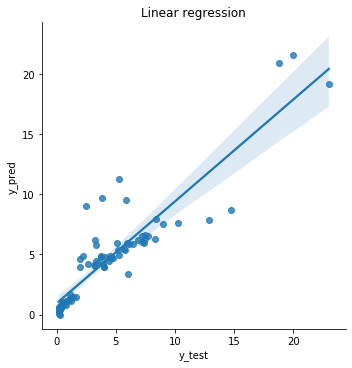

In [564]:
sns.lmplot(x="y_test",y="y_pred",data=df_lr)
plt.title("Linear regression")
plt.show()

In [533]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1748427258365326
MSE: 3.7413756564680662
RMSE: 1.9342635953943987


In [ ]:
sns.scatterplot(y_test,y_pred)
plt.show()

Lets try an ensemble model to see how it works on the data.


In [508]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [509]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([ 6.696 ,  2.8485,  0.5464,  2.951 ,  1.1613,  5.1465,  0.7944,
        4.702 , 10.144 ,  0.5453,  8.217 ,  4.435 ,  4.9605,  4.0625,
        0.2355,  0.2792,  5.126 ,  5.536 ,  4.795 ,  5.8445,  5.032 ,
        5.531 ,  6.8094,  7.5475, 11.94  ,  3.0955,  3.4496,  0.4987,
        0.2086,  0.5287,  0.3166,  0.3828,  5.17  , 24.28  , 21.255 ,
        3.971 ,  3.9475,  0.8914,  0.2772,  3.728 ,  7.2321,  9.1095,
        0.2827,  4.168 ,  3.2585,  3.928 ,  5.6405,  4.795 ,  6.936 ,
        1.1403,  5.148 ,  0.445 ,  2.787 ,  3.558 ,  1.0937,  0.1691,
       18.4745,  0.6883,  5.536 ,  5.8655,  0.346 ,  1.5185, 10.9445,
        4.7862,  0.5447,  0.555 ,  4.106 ,  0.3513,  8.0175,  0.3839,
        8.643 ,  6.876 ,  4.8602,  0.4512,  1.1805,  2.962 ])

In [549]:
df_rf=pd.DataFrame({"y_test":y_test,"y_pred_rf":y_pred_rf})
df_rf.reset_index(inplace=True)
df_rf.head()

,index,y_test,y_pred_rf
0,285,7.40,6.6960
1,248,4.00,2.8485
2,150,0.50,0.5464
3,217,3.15,2.9510
4,107,1.25,1.1613


In [510]:
rf.score(X_test,y_test)

0.866762533931787

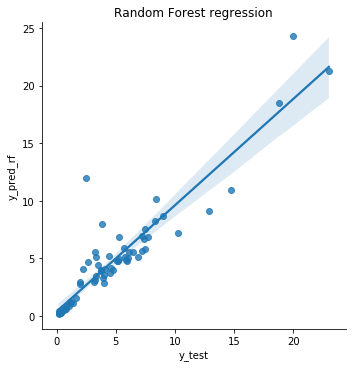

In [565]:
sns.lmplot(x="y_test",y="y_pred_rf",data=df_rf)
plt.title("Random Forest regression")
plt.show()

In [534]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 0.8803828947368421
MSE: 2.758116294605264
RMSE: 1.660757747115835


In [ ]:
Ensemble model worked better than Linear regression

Lets see if we can increase model score using hyperparamter tuning


In [515]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [584]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20,35,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,20,30,40,50]

In [585]:
#create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 181, 263, 345, 427, 509, 590, 672, 754, 836, 918, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20, 35, 30], 'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50]}


In [586]:
from sklearn.model_selection import RandomizedSearchCV
#parameters of RandomizedSearchCV 
#estimator=lr,param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1
rc=RandomizedSearchCV(estimator=rf,param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
#lets fit our data
rc.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30 
[CV]  n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30 
[CV]  n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30 
[CV]  n_estimators=918, min_samples_split=15, min_samples_leaf=40, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=672, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=672, min_samples_split=15, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   0.7s
[CV] n_estimators=672, min_samples_s

[CV]  n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=918, min_samples_split=5, min_samples_leaf=20, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=181, min_samples_split=20

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [587]:
#lets check the best paramters for Random forest
rc.best_params_

{'n_estimators': 263,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 25}

In [588]:
rc.best_score_

-4.885068204250308

In [589]:
y_pred_rc=rc.predict(X_test)
y_pred_rc

array([ 6.91051583,  2.87688357,  0.59389912,  2.95071313,  1.14751083,
        5.10852553,  0.78530962,  4.53369945,  9.71701308,  0.54942258,
        7.94429333,  4.37368746,  4.84335139,  4.0341264 ,  0.23471279,
        0.29219253,  4.94234399,  5.37040822,  5.28227107,  5.45194927,
        4.93984531,  5.89156079,  8.88183684,  7.79358577, 12.33615573,
        3.10198974,  3.46690817,  0.52492993,  0.19398874,  0.53956853,
        0.30850211,  0.37103697,  5.11830685, 24.41660963, 20.81913362,
        3.96700459,  3.97692966,  0.86412377,  0.29218492,  3.86277823,
        7.55337216,  9.35474197,  0.29705076,  4.06394617,  3.46805988,
        4.05013278,  5.43189759,  5.28227107,  6.57495998,  1.16434212,
        5.14094129,  0.44467776,  2.85451876,  3.41863223,  1.09557439,
        0.18417334, 20.06706968,  0.70618974,  5.37040822,  5.89497654,
        0.34311004,  1.44677885, 10.63536831,  4.62490002,  0.53974928,
        0.54528541,  3.9434511 ,  0.35828437,  8.03474646,  0.37

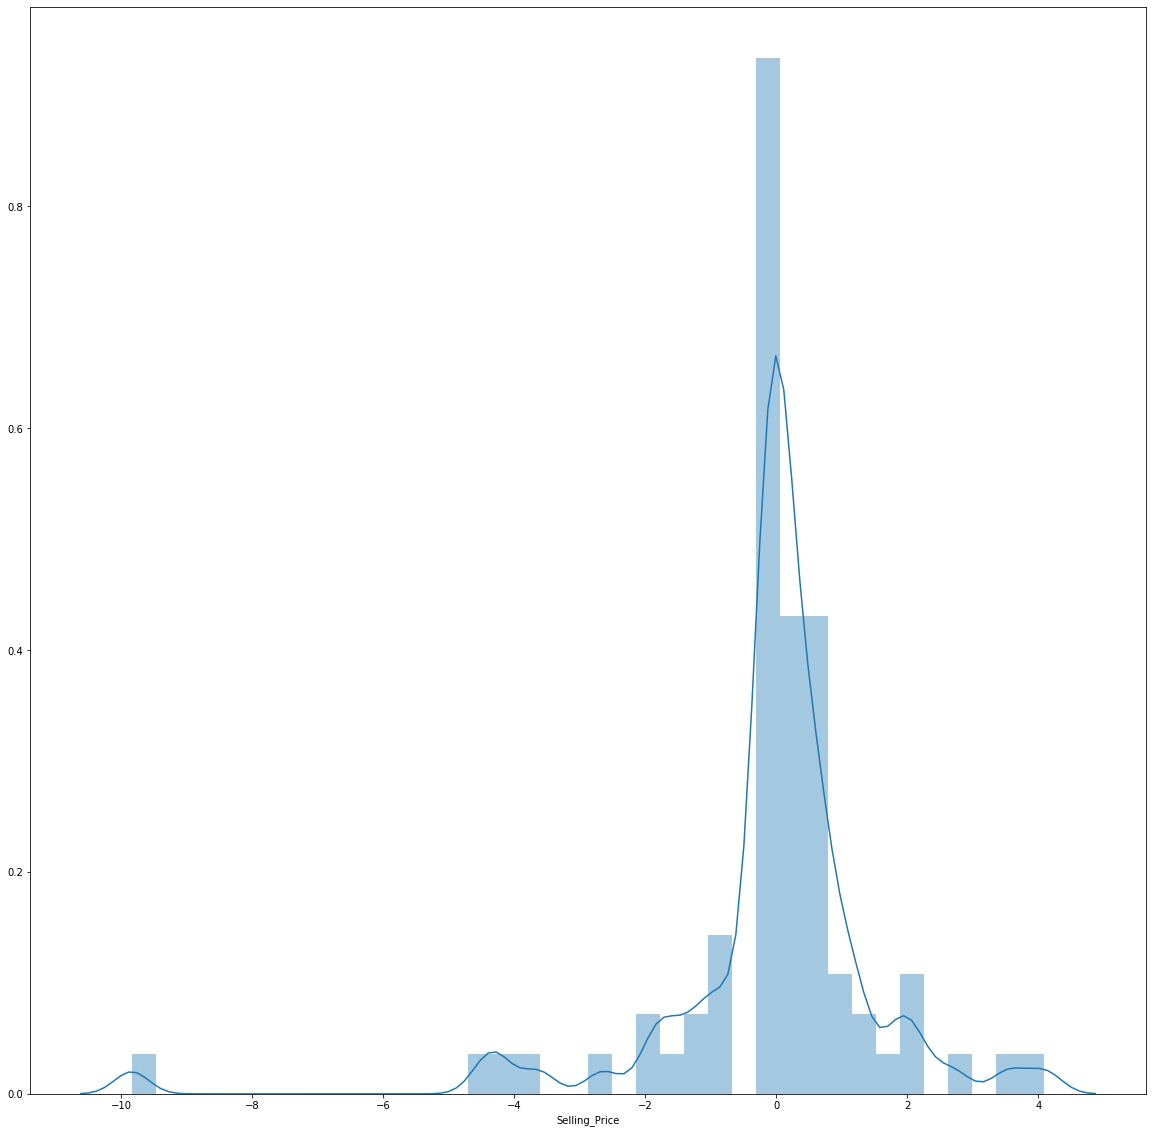

In [590]:
sns.distplot(y_test-y_pred_rc)

In [595]:
from sklearn import metrics
print("Hyper paraterised Random forest regressor")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rc))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rc)))

Hyper paraterised Random forest regressor
MAE: 0.9552627436810069
MSE: 3.0920111200546865
RMSE: 1.7584115331897383


In [592]:
df_rc=pd.DataFrame({"y_test":y_test,"y_pred_rc":y_pred_rc})
df_rc.reset_index(inplace=True)
df_rc.head()

,index,y_test,y_pred_rc
0,285,7.40,6.910516
1,248,4.00,2.876884
2,150,0.50,0.593899
3,217,3.15,2.950713
4,107,1.25,1.147511


In [600]:
df_rc["rc_error"]=df_rc["y_test"]-df_rc["y_pred_rc"]

In [601]:
df_rc["rc_error"]

0     0.489484
1     1.123116
2    -0.093899
3     0.199287
4     0.102489
        ...   
71    1.192850
72    1.287287
73   -0.051806
74   -0.018498
75   -1.003475
Name: rc_error, Length: 76, dtype: float64

In [607]:
df_rc["rc_error"].describe()

count    76.000000
mean     -0.072102
std       1.768607
min      -9.836156
25%      -0.207402
50%       0.038519
75%       0.576667
max       4.094632
Name: rc_error, dtype: float64

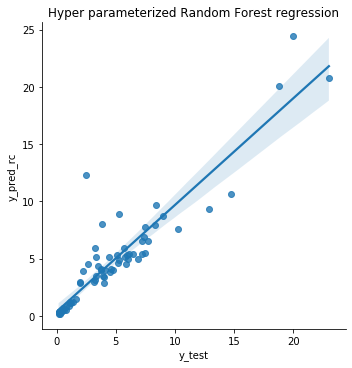

Hyper paraterised Random forest regressor
MAE: 0.9552627436810069
MSE: 3.0920111200546865
RMSE: 1.7584115331897383


In [596]:
sns.lmplot(x="y_test",y="y_pred_rc",data=df_rc)
plt.title("Hyper parameterized Random Forest regression")
plt.show()
print("Hyper paraterised Random forest regressor")
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rc))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rc)))

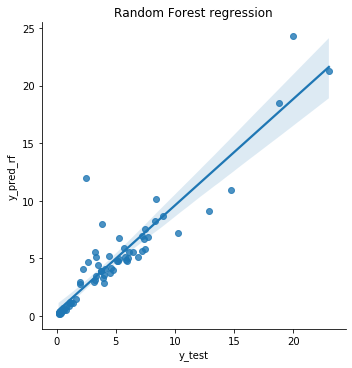

MAE: 0.8803828947368421
MSE: 2.758116294605264
RMSE: 1.660757747115835


In [597]:
sns.lmplot(x="y_test",y="y_pred_rf",data=df_rf)
plt.title("Random Forest regression")
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))


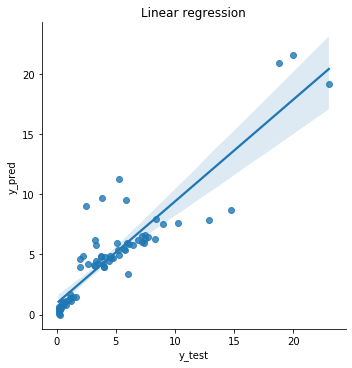

MAE: 1.1748427258365326
MSE: 3.7413756564680662
RMSE: 1.9342635953943987


In [598]:
sns.lmplot(x="y_test",y="y_pred",data=df_lr)
plt.title("Linear regression")
plt.show()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [617]:
X_train.shape

(225, 4)

ValueError: x and y must be the same size

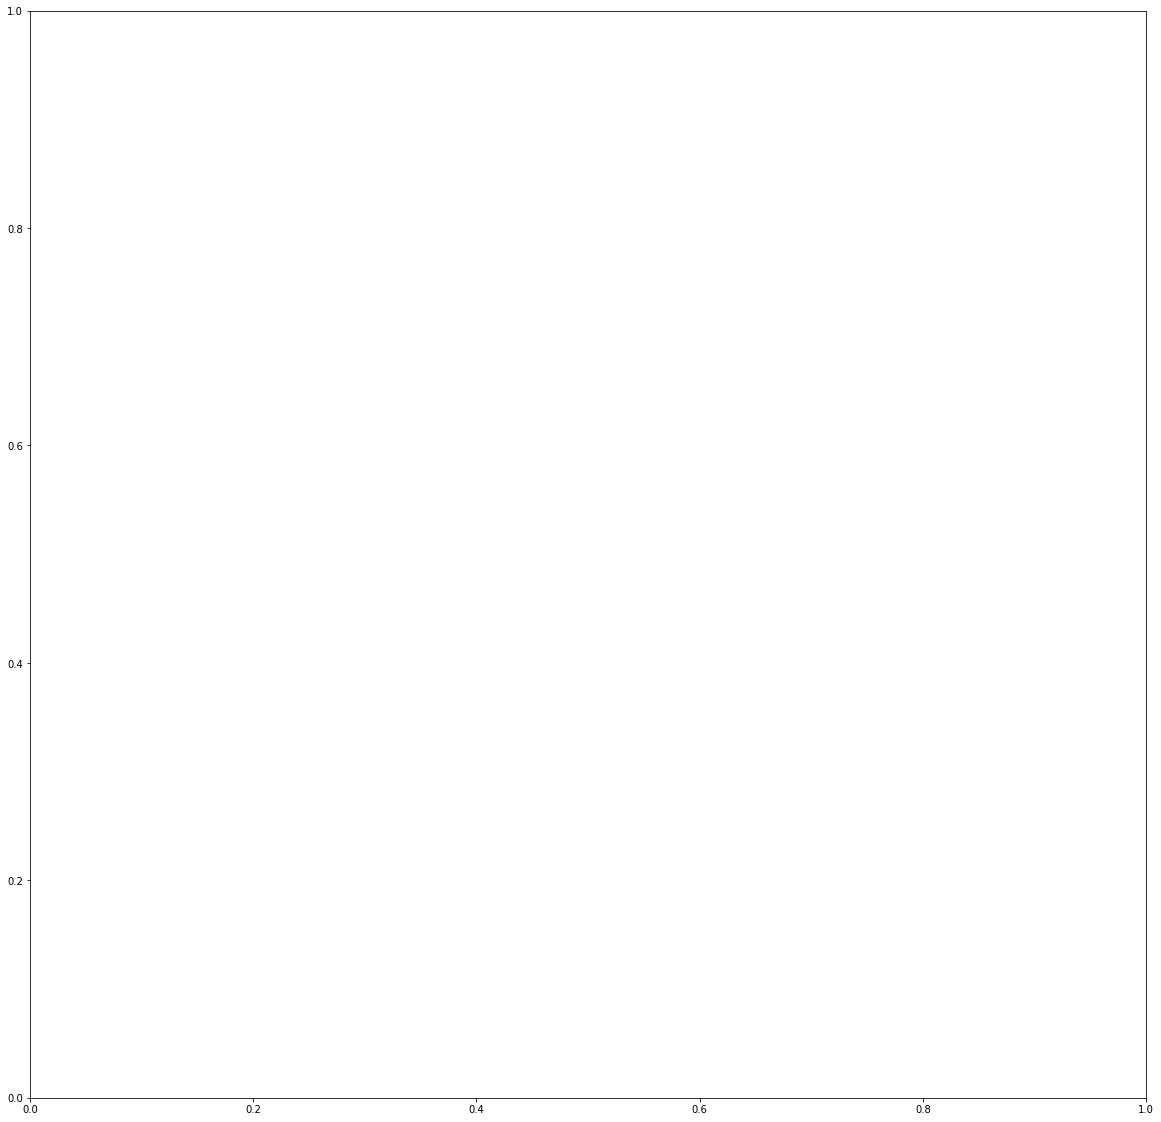

In [619]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,lr.predict(X_train), color = 'blue')
plt.show()

# Conclusion :Random forest woked better as a model for this sceanrio.